In [206]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

In [207]:
# Load the data
adv = pd.read_csv(r'C:\Users\asus\Desktop\Data_Science\Advance Machine Learning\AML.csv')

# 1. Data Understanding/Processing for Machine Learning

## 1.1 Data Understanding/Exploration

In [208]:
adv.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.00,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.00,61,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,202007020778474,7800.00,17,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,202007080986776,45000.00,16,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,202007161321269,64000.00,64,Grey,Land Rover,Range Rover Sport,USED,2015.00,26995,SUV,False,Diesel


In [209]:
adv.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.00,69,Grey,Peugeot,208,USED,2019.00,10595,Hatchback,False,Petrol
402001,202010315657341,110000.00,59,Red,Peugeot,107,USED,2009.00,2000,Hatchback,False,Petrol
402002,202010315659271,52760.00,62,White,Nissan,Qashqai,USED,2012.00,7250,SUV,False,Petrol
402003,202011015662436,10250.00,65,Red,Abarth,595,USED,2015.00,11490,Hatchback,False,Petrol
402004,201512149444029,14000.00,14,Silver,Audi,A4 Avant,USED,2014.00,20520,Estate,False,Diesel


In [210]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [211]:
# Change feature names so they are easier to access
adv = adv.rename(columns={
    'reg_code':'reg',
    'standard_colour':'colour',
    'standard_make':'make',
    'standard_model':'model',
    'vehicle_condition':'condition',
    'year_of_registration':'year',
    'body_type':'body',
    'crossover_car_and_van':'car_van',
    'fuel_type':'fuel'})

In [212]:
adv.shape

(402005, 12)

In [213]:
adv.dtypes

public_reference      int64
mileage             float64
reg                  object
colour               object
make                 object
model                object
condition            object
year                float64
price                 int64
body                 object
car_van                bool
fuel                 object
dtype: object

In [214]:
from scipy.stats import skew
numeric_cols = adv.select_dtypes(include=[np.number])
skewness = numeric_cols.apply(lambda x: skew(x.dropna()))
print(skewness)

public_reference   -11.37
mileage              1.45
year               -87.91
price              154.68
dtype: float64


In [215]:
numeric_stats = adv.describe()
numeric_stats

,public_reference,mileage,year,price
count,402005.00,401878.00,368694.00,402005.00
mean,202007077472444.47,37743.60,2015.01,17341.97
std,16916615997.34,34831.72,7.96,46437.46
min,201307177852187.00,0.00,999.00,120.00
25%,202009023197699.00,10481.00,2013.00,7495.00
50%,202009304400624.00,28629.50,2016.00,12600.00
75%,202010175124399.00,56875.75,2018.00,20000.00
max,202011025683478.00,999999.00,2020.00,9999999.00


In [216]:
adv.isnull().sum()

public_reference        0
mileage               127
reg                 31857
colour               5378
make                    0
model                   0
condition               0
year                33311
price                   0
body                  837
car_van                 0
fuel                  601
dtype: int64

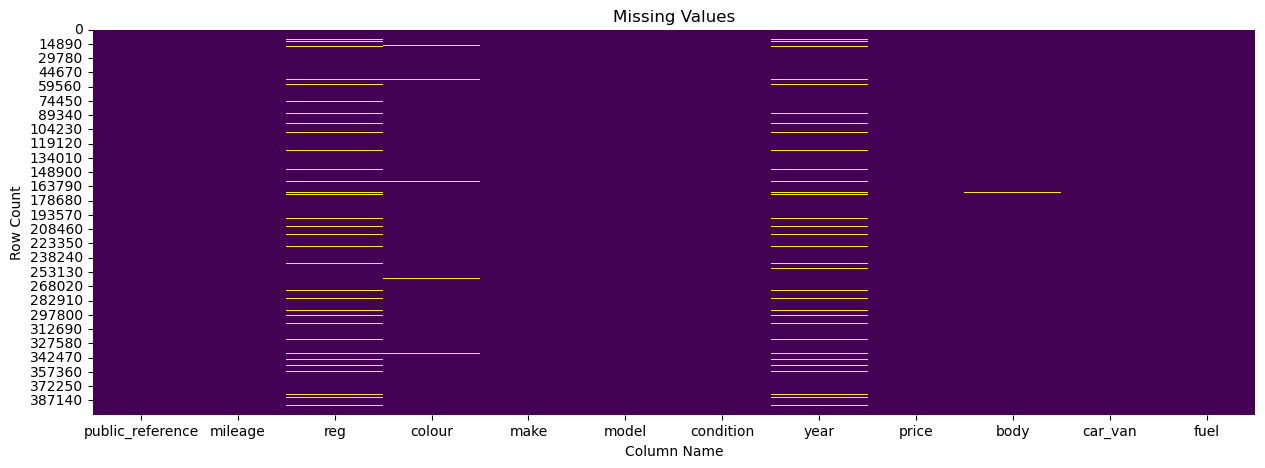

In [217]:
plt.figure(figsize=(15,5)) # Setting graph size
sns.heatmap(adv.isnull(), cmap = 'viridis', cbar=False)

# Setting graph title and x and y labels
plt.title('Missing Values')
plt.xlabel('Column Name')
plt.ylabel('Row Count')
plt.show() # To display the graph

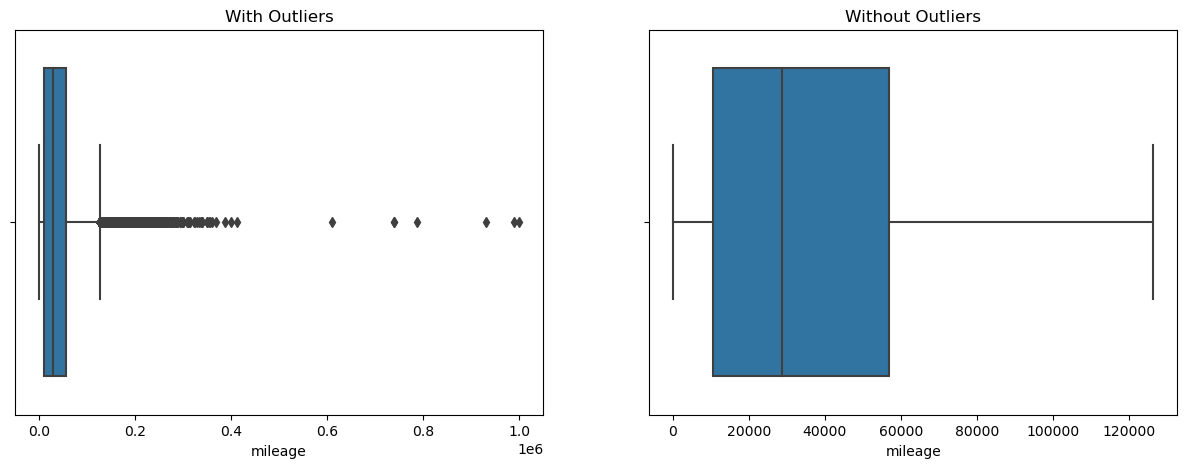

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # Setting graph size
# Visualization of Mileage column without outliers
sns.boxplot(data = adv, x='mileage', ax=axes[0])
axes[0].set_title('With Outliers')

# Visualization of Mileage column without outliers
sns.boxplot(data = adv, x='mileage', showfliers=False, ax=axes[1])
axes[1].set_title('Without Outliers')
plt.show() # To display the graph

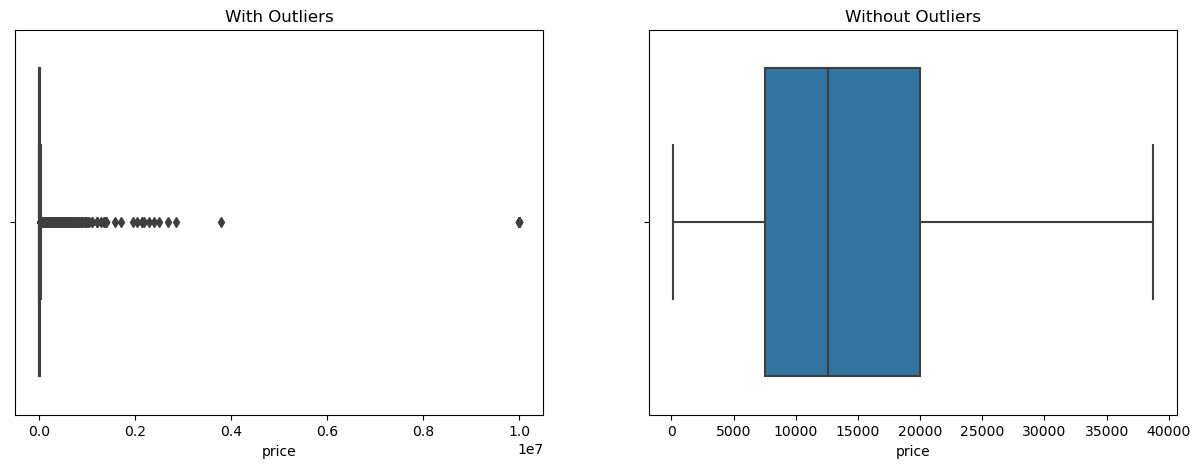

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # Setting graph size
# Visualization of Price column with outliers
sns.boxplot(data=adv, x='price', ax=axes[0]);
axes[0].set_title('With Outliers')

# Visualization of Price column without outliers
sns.boxplot(data=adv, x='price', showfliers=False, ax=axes[1]);
axes[1].set_title('Without Outliers')
plt.show() # To display the graph

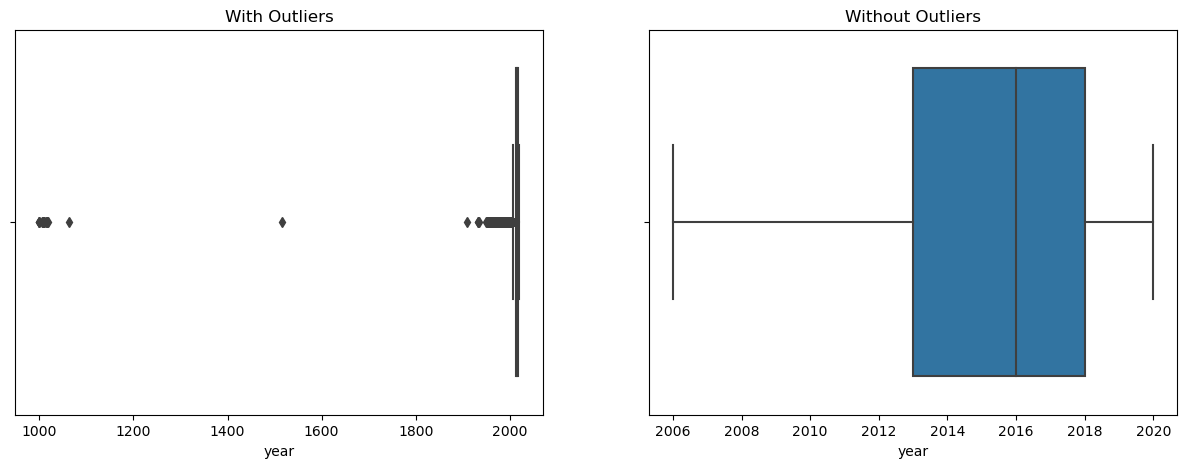

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # Setting graph size
# Visualization of year_of_registration column with outliers
sns.boxplot(data=adv, x='year', ax=axes[0])
axes[0].set_title('With Outliers')

# Visualization of year_of_registration column without outliers
sns.boxplot(data=adv, x='year', showfliers=False, ax=axes[1]);
axes[1].set_title('Without Outliers')
plt.show() # To display the graph

In [221]:
numeric_stats

,public_reference,mileage,year,price
count,402005.00,401878.00,368694.00,402005.00
mean,202007077472444.47,37743.60,2015.01,17341.97
std,16916615997.34,34831.72,7.96,46437.46
min,201307177852187.00,0.00,999.00,120.00
25%,202009023197699.00,10481.00,2013.00,7495.00
50%,202009304400624.00,28629.50,2016.00,12600.00
75%,202010175124399.00,56875.75,2018.00,20000.00
max,202011025683478.00,999999.00,2020.00,9999999.00


## 1.2 Data Cleaning

### 1.2.1 Filling Missing Values

In [222]:
# Here, I am dropping null values in body_type, fuel_type, and standard_colour columns
adv = adv.dropna(subset=['body', 'fuel', 'colour'])

In [223]:
adv = adv[adv['body'] != '']
adv = adv[adv['fuel'] != '']
adv = adv[adv['colour'] != '']

In [224]:
# I am filling missing values of year_or registration columns with the year 2020 where vehicle condition is NEW
adv.loc[(adv['condition'] == 'NEW') & (adv['year'].isnull()), 'year'] = 2020

In [225]:
con1 = adv.loc[(adv['reg'].isna() | (adv['reg'] == '')) & 
        (adv['year'] == 2020) & 
        (adv['mileage'] <= 1000), 'reg'] = '20'

I am filling in missing values in the reg_code with 20 because as per [Link](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom) cars that are registered in the year 2020 they have reg_code as 20 and 69. The reason I am using 20 here because the cars that are sold from 1st March - 31st August the reg_code is 20 and as per the condition the cars that have mileage less than 1000 would be the cars that are registered in this period.

In [226]:
con2 = adv.loc[(adv['reg'].isna() | (adv['reg'] == '')) & 
        (adv['year'] == 2020) & 
        (adv['mileage'] >= 1000), 'reg'] = '69'

I am filling in missing values in the reg_code with 69 because as per [Link](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom) cars that are registered in the year 2020 they have reg_code as 20 and 69. The reason I am using 69 here is because the cars that are sold from 1st September - 28/29th February the reg_code is 69 and as per the condition the cars that have mileage greater than 1000 would be the cars that are registered in this period.

In [227]:
adv.isnull().sum()

public_reference       0
mileage              117
reg                  485
colour                 0
make                   0
model                  0
condition              0
year                1569
price                  0
body                   0
car_van                0
fuel                   0
dtype: int64

In [228]:
# Creating a variable to check missing values in year_of_registration where reg_code is non null
yor_missing = adv[(adv['year'].isnull()) & (adv['reg'] != '')]

In [229]:
yor_missing.head()

,public_reference,mileage,reg,colour,make,model,condition,year,price,body,car_van,fuel
54,202007030806426,30000.00,18,Red,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,202008222801747,42847.00,61,Red,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,202010084741550,43130.00,66,White,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,202010305607535,63369.00,17,Blue,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1510,202010054642656,13406.00,NaN,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,False,Diesel


In [230]:
# Here, I am creating a dictionary to fill in the missing values in year_of_registration with the help of reg_code 
code = {'01': '2001', '02': '2002', '03': '2003', '04': '2004', '05': '2005', '06': '2006', '07':'2007', '08': '2008', '09': '2009', '10': '2010',
        '11': '2011', '12': '2012', '13': '2013', '14': '2014', '15': '2015', '16': '2016', '17':'2017', '18': '2018', '19': '2019', '20': '2020',
        '51': '2002', '52': '2003', '53': '2004', '54': '2005', '55': '2006', '56': '2007', '57':'2008', '58': '2009', '59': '2010', '60': '2011',
        '61': '2012', '62': '2013', '63': '2014', '64': '2015', '65': '2016', '66': '2017', '67':'2018', '68': '2019', '69': '2020', '70': '2021'}

In [231]:
# Creating a new column in the data set to map the dictionary with reg_code
adv['mapped_year'] = adv['reg'].map(code)

In [232]:
# Filling missing values in year_of_registration with the new column created
adv['year'].fillna(adv['mapped_year'], inplace=True)

In [233]:
# Missing values are filled now. So, dropping mapped_year column
adv.drop(columns='mapped_year', inplace=True)

In [234]:
# This will convert all non-numeric strings to NaN
adv['reg'] = pd.to_numeric(adv['reg'], errors='coerce')
adv = adv.dropna(subset=['reg'])

In [235]:
# Keeping the rows where 'reg_code' is between 1 to 20 or between 51 to 70
adv = adv[adv['reg'].between(1, 20) | adv['reg'].between(51, 70)]

In [236]:
adv['reg'].replace('', pd.NA, inplace=True)
adv.dropna(subset=['reg'], inplace=True)

In [237]:
# Creating a new variable and grouping year of registration and mileage to calculate the mean of each year
average_mileage_per_year = adv.groupby('year')['mileage'].mean()

In [238]:
# Filling missing values in mileage column with the help of year_of_registration with average of mileage of that 
# particular year
adv['mileage'] = adv.groupby('year')['mileage'].transform(lambda x: x.fillna(x.mean()))

In [239]:
adv.isnull().sum()

public_reference    0
mileage             0
reg                 0
colour              0
make                0
model               0
condition           0
year                0
price               0
body                0
car_van             0
fuel                0
dtype: int64

In [240]:
print(f'After filling missing values and removing incorrect values in particular rows, the new data set size is: {adv.shape}')

After filling missing values and removing incorrect values in particular rows, the new data set size is: (392235, 12)


### 1.2.2 Dealing with Outliers

#### Outliers in Price

In [241]:
# Calculate Q1, Q3, and IQR for each group
q1_price = adv.groupby(['make'])['price'].transform('quantile', 0.25)
q3_price = adv.groupby(['make'])['price'].transform('quantile', 0.75)
price_iqr = q3_price - q1_price

In [242]:
q1_price

0        11175.00
1        13495.00
2         7893.50
3         4800.00
4        19000.00
           ...   
402000    4990.75
402001    4990.75
402002    7000.00
402003    9997.50
402004   11489.50
Name: price, Length: 392235, dtype: float64

In [243]:
# Finding upper and lower bound in price column to remove outliers
lower_bound_price_val = q1_price - (1.5 * price_iqr)
upper_bound_price_val = q3_price + (1.5 * price_iqr)
print('Upper bound value for price',upper_bound_price_val)
print('Upper bound value for price',lower_bound_price_val)

Upper bound value for price 0        74487.50
1        64732.50
2        35290.38
3        19050.00
4        84620.00
           ...   
402000   24763.88
402001   24763.88
402002   25000.00
402003   36535.00
402004   42763.25
Name: price, Length: 392235, dtype: float64
Upper bound value for price 0        -26812.50
1        -17247.50
2         -8544.62
3         -3750.00
4        -20372.00
            ...   
402000    -6873.12
402001    -6873.12
402002    -3800.00
402003    -5925.00
402004    -7274.75
Name: price, Length: 392235, dtype: float64


In [244]:
# Removing outliers in price using upper bound
adv = adv[(adv['price'] <= upper_bound_price_val) & (adv['price'] >= lower_bound_price_val)]

In [245]:
adv.shape

(378775, 12)

#### Outliers in Mileage

In [246]:
mileage = adv['mileage'].values

In [247]:
# Finding 25 and 75 percentile of mileage

q1_mileage,q3_mileage = np.percentile(mileage,[25,75])
print('Mileage range', q1_mileage,q3_mileage)

Mileage range 12012.0 57600.0


In [248]:
# Find IQR for mileage

mileage_iqr = q3_mileage - q1_mileage
print('IQR for mileage is',mileage_iqr)

IQR for mileage is 45588.0


In [249]:
# Finding Lower and Upper bound for mileage

lower_bound_mileage_val = q1_mileage - (1.5 * mileage_iqr)
upper_bound_mileage_val = q3_mileage + (1.5 * mileage_iqr)
print('lower bound value for mileage',lower_bound_mileage_val)
print('Upper bound value for mileage',upper_bound_mileage_val)

lower bound value for mileage -56370.0
Upper bound value for mileage 125982.0


In [250]:
adv = adv[(adv['mileage'] <= upper_bound_mileage_val) & (adv['mileage'] >= lower_bound_mileage_val)]

In [251]:
adv.shape

(371020, 12)

#### Outliers in Year of Registration

In [252]:
adv['year'] = adv['year'].astype(int)

In [253]:
yor = adv['year'].values

In [254]:
# Finding 25 and 75 percentile of year of registration

q1_yor,q3_yor = np.percentile(yor,[25,75])
print('Year of registration range', q1_yor,q3_yor)

Year of registration range 2014.0 2018.0


In [255]:
# Find IQR for Year of registration

yor_iqr = q3_yor-q1_yor
print('IQR for year of registration is', yor_iqr)

IQR for year of registration is 4.0


In [256]:
# Finding upper and lower bound in year_of_registration column to remove outliers

lower_bound_yor_val = q1_yor - (1.5 * yor_iqr)
upper_bound_yor_val = q3_yor + (1.5 * yor_iqr)
print('lower bound value for year of registration',lower_bound_yor_val)
print('Upper bound value for year of registration',upper_bound_yor_val)

lower bound value for year of registration 2008.0
Upper bound value for year of registration 2024.0


In [257]:
adv = adv[(adv['year'] >= lower_bound_yor_val) & (adv['year'] <= upper_bound_yor_val)]

In [258]:
print(f'After removing outliers, the new data set size is: {adv.shape}')

After removing outliers, the new data set size is: (354264, 12)


# 2. Feature Engineering

## 2.1 Deriving Features

In [259]:
adv = adv.reset_index()
adv.drop('index', axis=1, inplace=True)

In [260]:
adv.tail()

,public_reference,mileage,reg,colour,make,model,condition,year,price,body,car_van,fuel
354259,202010315652942,5179.00,69.00,Grey,Peugeot,208,USED,2019,10595,Hatchback,False,Petrol
354260,202010315657341,110000.00,59.00,Red,Peugeot,107,USED,2009,2000,Hatchback,False,Petrol
354261,202010315659271,52760.00,62.00,White,Nissan,Qashqai,USED,2012,7250,SUV,False,Petrol
354262,202011015662436,10250.00,65.00,Red,Abarth,595,USED,2015,11490,Hatchback,False,Petrol
354263,201512149444029,14000.00,14.00,Silver,Audi,A4 Avant,USED,2014,20520,Estate,False,Diesel


In [261]:
# Creating a new column of vehicles age to identify the age of a vehicle with the current year i.e. 2023 for further analysis
adv['age'] = 2024 - adv['year']
adv.head(2)

,public_reference,mileage,reg,colour,make,model,condition,year,price,body,car_van,fuel,age
0,202006039777689,0.00,20.00,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid,4
1,202007020778260,108230.00,61.00,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,13


In [262]:
adv.dtypes

public_reference      int64
mileage             float64
reg                 float64
colour               object
make                 object
model                object
condition            object
year                  int32
price                 int64
body                 object
car_van                bool
fuel                 object
age                   int32
dtype: object

In [263]:
# Changing data type of year of registration coloumn as integer
adv['year'] = adv['year'].astype(int)
adv['mileage'] = adv['mileage'].astype(int)
adv['age'] = adv['age'].astype(int)
adv = adv[pd.to_numeric(adv['reg'], errors='coerce').notnull()]
adv['reg'] = adv['reg'].astype(int)

In [264]:
adv.dtypes

public_reference     int64
mileage              int32
reg                  int32
colour              object
make                object
model               object
condition           object
year                 int32
price                int64
body                object
car_van               bool
fuel                object
age                  int32
dtype: object

In [265]:
condition_mapping = {'NEW': 1, 'USED': 0}
adv['condition'] = adv['condition'].map(condition_mapping)

In [266]:
adv['reg'] = adv['reg'].astype(int)

In [267]:
adv['make/model'] = adv['make'] +' / '+ adv['model']

In [268]:
adv.dtypes

public_reference     int64
mileage              int32
reg                  int32
colour              object
make                object
model               object
condition            int64
year                 int32
price                int64
body                object
car_van               bool
fuel                object
age                  int32
make/model          object
dtype: object

In [269]:
adv.head(3)

,public_reference,mileage,reg,colour,make,model,condition,year,price,body,car_van,fuel,age,make/model
0,202006039777689,0,20,Grey,Volvo,XC90,1,2020,73970,SUV,False,Petrol Plug-in Hybrid,4,Volvo / XC90
1,202007020778260,108230,61,Blue,Jaguar,XF,0,2011,7000,Saloon,False,Diesel,13,Jaguar / XF
2,202007020778474,7800,17,Grey,SKODA,Yeti,0,2017,14000,SUV,False,Petrol,7,SKODA / Yeti


In [270]:
# Rearranging the columns
temp = ['public_reference', 'make/model', 'body', 'car_van', 'colour','fuel', 
        'condition', 'mileage', 'reg', 'year', 'age', 'price']

In [271]:
temp = adv[temp]
adv = temp

In [272]:
adv.shape

(354264, 12)

In [273]:
adv.head(1)

,public_reference,make/model,body,car_van,colour,fuel,condition,mileage,reg,year,age,price
0,202006039777689,Volvo / XC90,SUV,False,Grey,Petrol Plug-in Hybrid,1,0,20,2020,4,73970


In [274]:
adv.dtypes

public_reference     int64
make/model          object
body                object
car_van               bool
colour              object
fuel                object
condition            int64
mileage              int32
reg                  int32
year                 int32
age                  int32
price                int64
dtype: object

In [275]:
numeric_cols = ['public_reference', 'car_van', 'condition', 'mileage', 'reg', 'year', 'age', 'price']

## 2.2 Categorical Encoding

In [276]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [277]:
ohe_cat_cols = ['fuel']

In [278]:
# Categorical Encoding with One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(adv[ohe_cat_cols])

In [279]:
one_hot_encoded_df.dtypes

fuel_Bi Fuel                  uint8
fuel_Diesel                   uint8
fuel_Diesel Hybrid            uint8
fuel_Diesel Plug-in Hybrid    uint8
fuel_Electric                 uint8
fuel_Petrol                   uint8
fuel_Petrol Hybrid            uint8
fuel_Petrol Plug-in Hybrid    uint8
dtype: object

In [280]:
one_hot_encoded_df.head()

,fuel_Bi Fuel,fuel_Diesel,fuel_Diesel Hybrid,fuel_Diesel Plug-in Hybrid,fuel_Electric,fuel_Petrol,fuel_Petrol Hybrid,fuel_Petrol Plug-in Hybrid
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [281]:
for col in ['make/model', 'body', 'colour']:
    target_means = adv.groupby(col)['price'].mean()
    adv[col + '_encoded'] = adv[col].map(target_means)

In [282]:
adv_encoded = pd.concat([adv.drop(ohe_cat_cols + ['make/model', 'body','colour'], axis=1), 
                          one_hot_encoded_df], axis=1)

In [283]:
adv_encoded.shape

(354264, 19)

In [284]:
adv_encoded.dtypes

public_reference                int64
car_van                          bool
condition                       int64
mileage                         int32
reg                             int32
year                            int32
age                             int32
price                           int64
make/model_encoded            float64
body_encoded                  float64
colour_encoded                float64
fuel_Bi Fuel                    uint8
fuel_Diesel                     uint8
fuel_Diesel Hybrid              uint8
fuel_Diesel Plug-in Hybrid      uint8
fuel_Electric                   uint8
fuel_Petrol                     uint8
fuel_Petrol Hybrid              uint8
fuel_Petrol Plug-in Hybrid      uint8
dtype: object

In [285]:
adv_encoded

,public_reference,car_van,condition,mileage,reg,year,age,price,make/model_encoded,body_encoded,colour_encoded,fuel_Bi Fuel,fuel_Diesel,fuel_Diesel Hybrid,fuel_Diesel Plug-in Hybrid,fuel_Electric,fuel_Petrol,fuel_Petrol Hybrid,fuel_Petrol Plug-in Hybrid
0,202006039777689,False,1,0,20,2020,4,73970,41606.03,20803.97,18576.08,0,0,0,0,0,0,0,1
1,202007020778260,False,0,108230,61,2011,13,7000,16124.40,19092.47,16002.77,0,1,0,0,0,0,0,0
2,202007020778474,False,0,7800,17,2017,7,14000,10647.69,20803.97,18576.08,0,0,0,0,0,1,0,0
3,202007080986776,False,0,45000,16,2016,8,7995,7843.04,10643.76,13150.60,0,1,0,0,0,0,0,0
4,202007161321269,False,0,64000,64,2015,9,26995,39212.45,20803.97,18576.08,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354259,202010315652942,False,0,5179,69,2019,5,10595,8523.32,10643.76,18576.08,0,0,0,0,0,1,0,0
354260,202010315657341,False,0,110000,59,2009,15,2000,2889.63,10643.76,13723.73,0,0,0,0,0,1,0,0
354261,202010315659271,False,0,52760,62,2012,12,7250,12790.08,20803.97,15645.16,0,0,0,0,0,1,0,0
354262,202011015662436,False,0,10250,65,2015,9,11490,16119.07,10643.76,13723.73,0,0,0,0,0,1,0,0


In [286]:
adv_encoded['make/model_encoded'] = adv_encoded['make/model_encoded'].astype(int)

In [287]:
adv_encoded['body_encoded'] = adv_encoded['body_encoded'].astype(int)

In [288]:
adv_encoded['colour_encoded'] = adv_encoded['colour_encoded'].astype(int)

In [289]:
adv_encoded

,public_reference,car_van,condition,mileage,reg,year,age,price,make/model_encoded,body_encoded,colour_encoded,fuel_Bi Fuel,fuel_Diesel,fuel_Diesel Hybrid,fuel_Diesel Plug-in Hybrid,fuel_Electric,fuel_Petrol,fuel_Petrol Hybrid,fuel_Petrol Plug-in Hybrid
0,202006039777689,False,1,0,20,2020,4,73970,41606,20803,18576,0,0,0,0,0,0,0,1
1,202007020778260,False,0,108230,61,2011,13,7000,16124,19092,16002,0,1,0,0,0,0,0,0
2,202007020778474,False,0,7800,17,2017,7,14000,10647,20803,18576,0,0,0,0,0,1,0,0
3,202007080986776,False,0,45000,16,2016,8,7995,7843,10643,13150,0,1,0,0,0,0,0,0
4,202007161321269,False,0,64000,64,2015,9,26995,39212,20803,18576,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354259,202010315652942,False,0,5179,69,2019,5,10595,8523,10643,18576,0,0,0,0,0,1,0,0
354260,202010315657341,False,0,110000,59,2009,15,2000,2889,10643,13723,0,0,0,0,0,1,0,0
354261,202010315659271,False,0,52760,62,2012,12,7250,12790,20803,15645,0,0,0,0,0,1,0,0
354262,202011015662436,False,0,10250,65,2015,9,11490,16119,10643,13723,0,0,0,0,0,1,0,0


## 2.3 Polynomial and Interaction Features

### 2.3.1 Splitting Data (Small Sample)

In [290]:
adv_pf = adv_encoded.sample(n=10000, random_state=1)
adv_pf.reset_index(drop=True, inplace=True)

In [291]:
adv_pf.head()

,public_reference,car_van,condition,mileage,reg,year,age,price,make/model_encoded,body_encoded,colour_encoded,fuel_Bi Fuel,fuel_Diesel,fuel_Diesel Hybrid,fuel_Diesel Plug-in Hybrid,fuel_Electric,fuel_Petrol,fuel_Petrol Hybrid,fuel_Petrol Plug-in Hybrid
0,202009073426279,False,0,151,70,2020,4,34990,20988,20803,15645,0,1,0,0,0,0,0,0
1,202010064678502,False,1,1,20,2020,4,34490,31557,19092,13723,0,0,0,0,0,1,0,0
2,202008132440195,False,0,9002,69,2020,4,15952,13015,10643,17357,0,1,0,0,0,0,0,0
3,202008112363293,False,1,0,20,2020,4,17696,10644,10643,17383,0,0,0,0,0,1,0,0
4,202004309118614,False,0,32156,66,2016,8,10490,17564,20803,17357,0,1,0,0,0,0,0,0


In [292]:
X = adv_pf.drop('price', axis=1)
y = adv_pf['price']

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of sample training data:', X_train.shape)
print('Shape of sample test data:', X_test.shape)

Shape of sample training data: (8000, 18)
Shape of sample test data: (2000, 18)


### 2.3.2 Linear and Polynomial Regression

In [294]:
import sklearn
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [295]:
normal_reg = Pipeline(steps=[('est', LinearRegression())])
poly_reg = Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),('est', LinearRegression())])

#### 2.3.2.1 Linear Regression

In [296]:
normal_reg.fit(X_train, y_train)

Pipeline(steps=[('est', LinearRegression())])

In [297]:
normal_reg_y_pred = normal_reg.predict(X_test)
normal_reg_r2_Score = r2_score(y_test, normal_reg_y_pred)*100
normal_reg_mean_abs_err = mean_absolute_error(y_test, normal_reg_y_pred)
normal_reg_mean_sqr_err = np.sqrt(mean_squared_error(y_test, normal_reg_y_pred))

In [298]:
print('r2 score: ',normal_reg_r2_Score ,'%')
print('mean absolute error: ',normal_reg_mean_abs_err)
print('mean squared error: ',normal_reg_mean_sqr_err)

r2 score:  84.79500161509159 %
mean absolute error:  3210.662142415506
mean squared error:  5274.727186518718


In [299]:
from sklearn.model_selection import cross_validate
eval_results = cross_validate(
    normal_reg, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [300]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(3393.5414269360494, 89.31088887906559)

In [301]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(3382.1534849055024, 27.267655681551922)

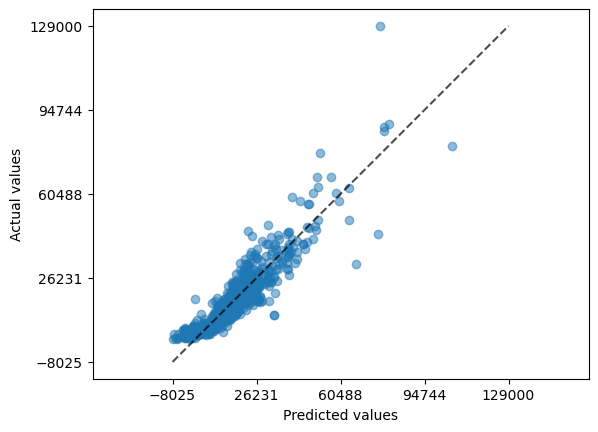

In [302]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    normal_reg, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5));

#### 2.3.2.2 Polynomial Regression

In [303]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('est', LinearRegression())])

In [304]:
poly_reg_y_pred = poly_reg.predict(X_test)
poly_reg_r2_Score = r2_score(y_test, poly_reg_y_pred)*100
poly_reg_mean_abs_err = mean_absolute_error(y_test, poly_reg_y_pred)
poly_reg_mean_sqr_err = np.sqrt(mean_squared_error(y_test, poly_reg_y_pred))

In [305]:
print('r2 score: ',poly_reg_r2_Score ,'%')
print('mean absolute error: ',poly_reg_mean_abs_err)
print('mean squared error: ',poly_reg_mean_sqr_err)

r2 score:  88.24608730319468 %
mean absolute error:  2831.6387460052683
mean squared error:  4637.650789640073


In [306]:
from sklearn.model_selection import cross_validate
eval_results = cross_validate(
    poly_reg, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True)

In [307]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(46693.92064094439, 87385.109577264)

In [308]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(2929.5999301930037, 30.798897475597997)

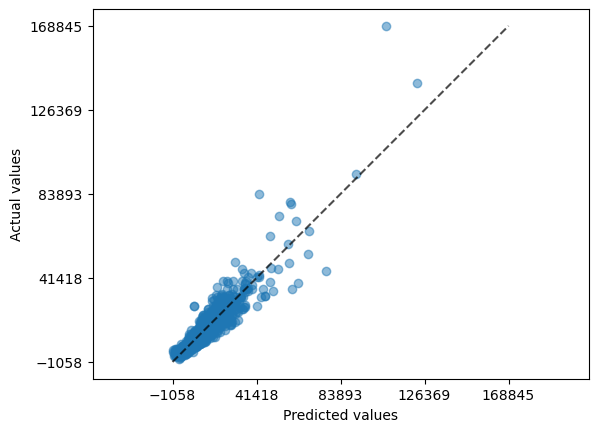

In [309]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    poly_reg, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

# 3 Feature Selection and Dimensionality Reduction 

## 3.1 Manual Feature Selection

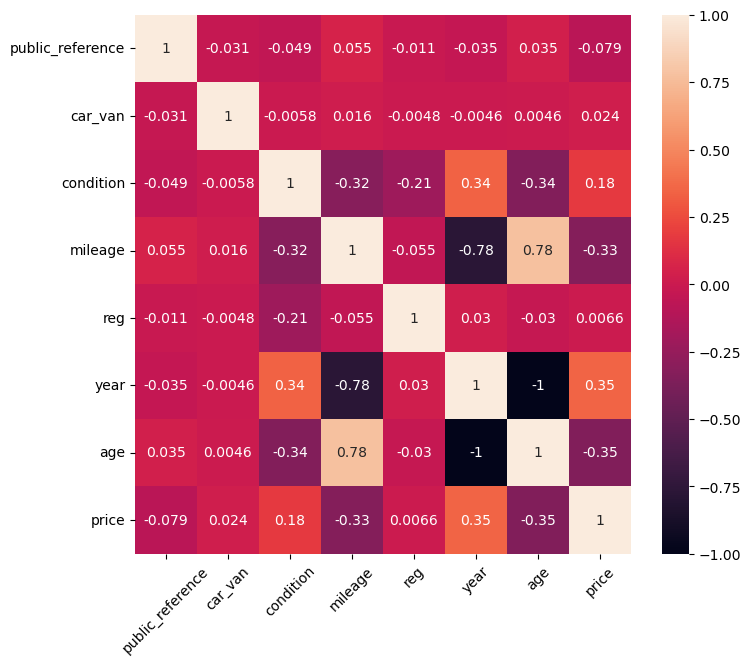

In [310]:
fig, ax=plt.subplots(figsize=(8,7))
sns.heatmap(adv[numeric_cols].corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

In [311]:
# As per the current data understanding and correlation matrics I don't think public reference and crossover_car_and_van 
# is an important feature. So, dropping them for further analysis
adv_encoded.drop('public_reference', axis=1, inplace=True)
adv_encoded.drop('car_van', axis=1, inplace=True)

# We already have vehicles age so, dropping year of registration and reg because vehicles age is more important
adv_encoded.drop('year', axis=1, inplace=True)
# adv_encoded.drop('reg', axis=1, inplace=True)

## 3.2 Automated Feature Selection (Recursive Feature Elimination)

In [312]:
from sklearn.feature_selection import SelectKBest, f_regression

In [313]:
adv_encoded.shape

(354264, 16)

In [314]:
adv_enc = adv_encoded.sample(n=10000, random_state=1)

In [315]:
X_lf = adv_enc.drop('price', axis=1)
y_lf = adv_enc['price']

X_train_lf, X_test_lf, y_train_lf, y_test_lf = train_test_split(X_lf, y_lf, test_size=0.2, random_state=7)

In [316]:
X_train_lf

,condition,mileage,reg,age,make/model_encoded,body_encoded,colour_encoded,fuel_Bi Fuel,fuel_Diesel,fuel_Diesel Hybrid,fuel_Diesel Plug-in Hybrid,fuel_Electric,fuel_Petrol,fuel_Petrol Hybrid,fuel_Petrol Plug-in Hybrid
195809,0,35000,15,9,13695,15981,13875,0,1,0,0,0,0,0,0
334179,0,52000,63,10,39212,20803,17357,0,1,0,0,0,0,0,0
105958,1,10,20,4,9630,10643,13723,0,0,0,0,0,0,1,0
9587,0,28000,63,10,8262,10643,15645,0,0,0,0,0,1,0,0
130022,0,24889,68,6,10362,20803,13723,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222054,0,77500,60,14,15015,10643,16002,0,1,0,0,0,0,0,0
334300,0,67500,62,12,19313,25650,15645,0,0,0,0,0,1,0,0
12646,1,5,20,4,23536,20803,13723,0,0,0,0,0,1,0,0
135198,0,47000,9,15,4434,10643,17357,0,0,0,0,0,1,0,0


In [317]:
# Sample Data after manual feature selection guided by Domain Knowledge
print('Shape of sample training data:', X_train_lf.shape)
print('Shape of sample test data:', X_test_lf.shape)

Shape of sample training data: (8000, 15)
Shape of sample test data: (2000, 15)


In [318]:
from sklearn.feature_selection import RFECV

In [319]:
model = LinearRegression()

# Create RFECV instance
ref_selector_lf = RFECV(model, step=1, cv=5)

# Fit RFECV instance to your data
ref_selector_lf.fit(X_lf, y_lf)

RFECV(cv=5, estimator=LinearRegression())

In [320]:
rfe_y_pred = ref_selector_lf.predict(X_test_lf)
rfe_r2_Score = r2_score(y_test_lf, rfe_y_pred)*100
rfe_mean_abs_err = mean_absolute_error(y_test_lf, rfe_y_pred)
rfe_mean_sqr_err = np.sqrt(mean_squared_error(y_test_lf, rfe_y_pred))

In [321]:
print('r2 score: ',rfe_r2_Score ,'%')
print('mean absolute error: ',rfe_mean_abs_err)
print('mean squared error: ',rfe_mean_sqr_err)

r2 score:  87.33337966177005 %
mean absolute error:  3461.1146144243357
mean squared error:  6342.341341583058


In [322]:
X_sel_lf = ref_selector_lf.transform(X_lf)

In [323]:
print("Features extended dataset: ", ref_selector_lf.get_feature_names_out())

Features extended dataset:  ['condition' 'mileage' 'reg' 'age' 'make/model_encoded' 'colour_encoded'
 'fuel_Bi Fuel' 'fuel_Diesel' 'fuel_Diesel Hybrid'
 'fuel_Diesel Plug-in Hybrid' 'fuel_Electric' 'fuel_Petrol'
 'fuel_Petrol Hybrid' 'fuel_Petrol Plug-in Hybrid']


In [324]:
X_train_lf.keys()

Index(['condition', 'mileage', 'reg', 'age', 'make/model_encoded',
       'body_encoded', 'colour_encoded', 'fuel_Bi Fuel', 'fuel_Diesel',
       'fuel_Diesel Hybrid', 'fuel_Diesel Plug-in Hybrid', 'fuel_Electric',
       'fuel_Petrol', 'fuel_Petrol Hybrid', 'fuel_Petrol Plug-in Hybrid'],
      dtype='object')

In [325]:
n_scores = len(ref_selector_lf.cv_results_["mean_test_score"])
n_scores

15

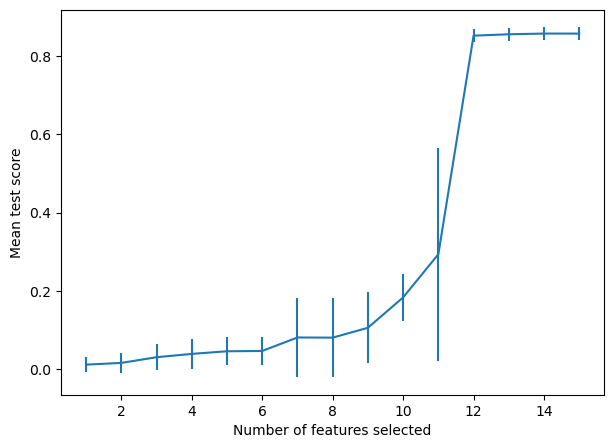

In [326]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector_lf.cv_results_["mean_test_score"],
    yerr=ref_selector_lf.cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

# 4. Model Building

In [327]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [328]:
adv_encoded = adv_encoded.astype('int64')

In [329]:
adv_model = adv_encoded.sample(n=50000, random_state=1)
adv_model.reset_index(drop=True, inplace=True)

X = adv_encoded.drop(columns=['price', 'body_encoded', 'colour_encoded'], axis=1)
y = adv_encoded['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Shape of sample training data:', X_train.shape)
print('Shape of sample test data:', X_test.shape)

Shape of sample training data: (283411, 13)
Shape of sample test data: (70853, 13)


In [330]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Feature scaling for numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_scaled contains the Min-Max scaled feature

"""##A Late Value Imputation"""

imp = SimpleImputer()

imp.fit(X_train_scaled)

X_train_imp = imp.transform(X_train_scaled)

X_test_imp = imp.transform(X_test_scaled)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [331]:
lr.fit(X_train_imputed, y_train)

LinearRegression()

In [332]:
lr_y_pred = lr.predict(X_test_imputed)
lr_r2_Score = r2_score(y_test, lr_y_pred)*100
lr_mean_abs_err = mean_absolute_error(y_test, lr_y_pred)
lr_mean_sqr_err = np.sqrt(mean_squared_error(y_test, lr_y_pred))

In [333]:
print('r2 score: ',lr_r2_Score ,'%')
print('mean absolute error: ',lr_mean_abs_err)
print('mean squared error: ',lr_mean_sqr_err)

r2 score:  86.57457414299401 %
mean absolute error:  3358.9964786247583
mean squared error:  5613.807843983003


In [334]:
rf.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=7)

In [335]:
rf_y_pred = rf.predict(X_test_imputed)
rf_r2_Score = r2_score(y_test, rf_y_pred)*100
rf_mean_abs_err = mean_absolute_error(y_test, rf_y_pred)
rf_mean_sqr_err = np.sqrt(mean_squared_error(y_test, rf_y_pred))

In [336]:
print('r2 score: ',rf_r2_Score ,'%')
print('mean absolute error: ',rf_mean_abs_err)
print('mean squared error: ',rf_mean_sqr_err)

r2 score:  95.70846633200667 %
mean absolute error:  1731.2274419127777
mean squared error:  3173.947725960914


## 4.1 Linear Model

In [337]:
%%time
# Linear Regressor
lr = LinearRegression()
lr.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 122 ms


LinearRegression()

In [338]:
lr_y_pred = lr.predict(X_test)
lr_r2_Score = r2_score(y_test, lr_y_pred)*100
lr_mean_abs_err = mean_absolute_error(y_test, lr_y_pred)
lr_mean_sqr_err = np.sqrt(mean_squared_error(y_test, lr_y_pred))

In [339]:
print('r2 score: ',lr_r2_Score ,'%')
print('mean absolute error: ',lr_mean_abs_err)
print('mean squared error: ',lr_mean_sqr_err)

r2 score:  86.57448915495077 %
mean absolute error:  3358.974434136327
mean squared error:  5613.825612722477


# 4.2 Random Forest

In [340]:
%%time
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

CPU times: total: 3min 2s
Wall time: 3min 20s


RandomForestRegressor(random_state=7)

In [341]:
rf_y_pred = rf.predict(X_test)
rf_r2_Score = r2_score(y_test, rf_y_pred)*100
rf_mean_abs_err = mean_absolute_error(y_test, rf_y_pred)
rf_mean_sqr_err = np.sqrt(mean_squared_error(y_test, rf_y_pred))

In [342]:
print('r2 score: ',rf_r2_Score ,'%')
print('mean absolute error: ',rf_mean_abs_err)
print('mean squared error: ',rf_mean_sqr_err)

r2 score:  95.71018325242817 %
mean absolute error:  1731.5972300814149
mean squared error:  3173.312759392183


## 4.3 Boosted Tree

In [343]:
%%time
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

CPU times: total: 28.2 s
Wall time: 28.8 s


GradientBoostingRegressor()

In [344]:
gb_y_pred = gb.predict(X_test)
gb_r2_Score = r2_score(y_test, gb_y_pred)*100
gb_mean_abs_err = mean_absolute_error(y_test, gb_y_pred)
gb_mean_sqr_err = np.sqrt(mean_squared_error(y_test, gb_y_pred))

In [345]:
print('r2 score: ',gb_r2_Score ,'%')
print('mean absolute error: ',gb_mean_abs_err)
print('mean squared error: ',gb_mean_sqr_err)

r2 score:  91.94439343141565 %
mean absolute error:  2606.843236509099
mean squared error:  4348.531610830453


## 4.4 An Averager/Voter/Stacker Ensemble

In [346]:
from sklearn.ensemble import VotingRegressor
ensemble = VotingRegressor(
    [("gb", gb), ("rf", rf), ('lr', lr)
    ])
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('rf', RandomForestRegressor(random_state=7)),
                            ('lr', LinearRegression())])

In [347]:
ensemble_y_pred = ensemble.predict(X_test)
ensemble_r2_Score = r2_score(y_test, ensemble_y_pred)*100
ensemble_mean_abs_err = mean_absolute_error(y_test, ensemble_y_pred)
ensemble_mean_sqr_err = np.sqrt(mean_squared_error(y_test, ensemble_y_pred))

In [348]:
print('r2 score: ',ensemble_r2_Score ,'%')
print('mean absolute error: ',ensemble_mean_abs_err)
print('mean squared error: ',ensemble_mean_sqr_err)

r2 score:  93.59939757438782 %
mean absolute error:  2300.5438473520103
mean squared error:  3876.179975570488


## 4.5 Model Ranking

In [349]:
result = (pd.DataFrame({'Algorithm': ['Linear Regression','Random Forest','Boosted Tree', 'Ensemble'],
                        'Accuracy':[lr_r2_Score, rf_r2_Score, gb_r2_Score, ensemble_r2_Score],
                        'Mean Absolute Error':[lr_mean_abs_err, rf_mean_abs_err, gb_mean_abs_err, ensemble_mean_abs_err],
                        'Mean Squared Error':[lr_mean_sqr_err, rf_mean_sqr_err, gb_mean_sqr_err, ensemble_mean_sqr_err]
}).sort_values('Accuracy', ascending=False)).reset_index().drop('index', axis=1)
result

,Algorithm,Accuracy,Mean Absolute Error,Mean Squared Error
0,Random Forest,95.71,1731.60,3173.31
1,Ensemble,93.60,2300.54,3876.18
2,Boosted Tree,91.94,2606.84,4348.53
3,Linear Regression,86.57,3358.97,5613.83


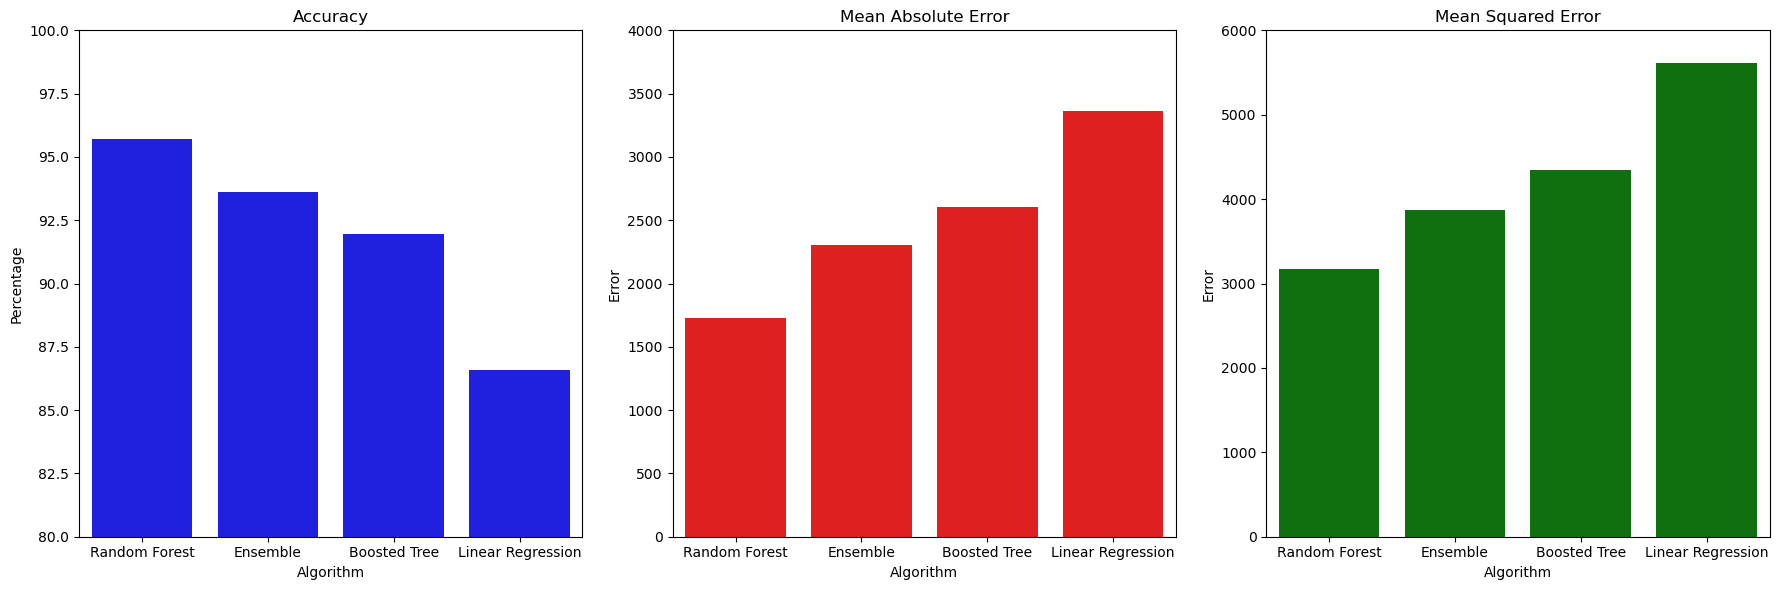

In [350]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize to better fit your display

# Plotting each metric in a separate subplot
sns.barplot(data=result, x='Algorithm', y='Accuracy', ax=axs[0], color='b')
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Percentage')
axs[0].set_ylim(80, 100)  # Adjust based on your data scale

sns.barplot(data=result, x='Algorithm', y='Mean Absolute Error', ax=axs[1], color='r')
axs[1].set_title('Mean Absolute Error')
axs[1].set_ylabel('Error')
axs[1].set_ylim(0, 4000)  # Adjust based on your data scale

sns.barplot(data=result, x='Algorithm', y='Mean Squared Error', ax=axs[2], color='g')
axs[2].set_title('Mean Squared Error')
axs[2].set_ylabel('Error')
axs[2].set_ylim(0, 6000)  # Adjust based on your data scale

# Improving layout and aesthetics
plt.tight_layout()
plt.show()

In [351]:
train_lr_y_pred = lr.predict(X_train)
train_lr_r2_Score = r2_score(y_train, train_lr_y_pred)*100
train_lr_mean_abs_err = mean_absolute_error(y_train, train_lr_y_pred)
train_lr_mean_sqr_err = np.sqrt(mean_squared_error(y_train, train_lr_y_pred))

In [352]:
print('r2 score: ',train_lr_r2_Score ,'%')
print('mean absolute error: ',train_lr_mean_abs_err)
print('mean squared error: ',train_lr_mean_sqr_err)

r2 score:  88.86409129487515 %
mean absolute error:  3371.6625067204754
mean squared error:  5923.309408874226


In [353]:
if train_lr_r2_Score > lr_r2_Score:
    print("The Linear model may be overfitting the training data.")
elif train_lr_r2_Score < lr_r2_Score:
    print("The Linear model may be underfitting the training data.")
else:
    print("The Linear model has a balanced fit on the training and test data.")

# Consider using MAE differences as well
if train_lr_mean_abs_err < lr_mean_abs_err:
    print("Potential overfitting: higher error on test set.")
else:
    print("Good error balance between training and test sets.")

The Linear model may be overfitting the training data.
Good error balance between training and test sets.


In [354]:
train_rf_y_pred = rf.predict(X_train)
train_rf_r2_Score = r2_score(y_train, train_rf_y_pred)*100
train_rf_mean_abs_err = mean_absolute_error(y_train, train_rf_y_pred)
train_rf_mean_sqr_err = np.sqrt(mean_squared_error(y_train, train_rf_y_pred))

In [355]:
print('r2 score: ',train_rf_r2_Score ,'%')
print('mean absolute error: ',train_rf_mean_abs_err)
print('mean squared error: ',train_rf_mean_sqr_err)

r2 score:  99.08574014629623 %
mean absolute error:  756.6380516660035
mean squared error:  1697.213247346541


In [356]:
if train_rf_r2_Score > rf_r2_Score:
    print("The Random Forest may be overfitting the training data.")
elif train_rf_r2_Score < rf_r2_Score:
    print("The Random Forest may be underfitting the training data.")
else:
    print("The Random Forest model has a balanced fit on the training and test data.")

# Consider using MAE differences as well
if train_rf_mean_abs_err < rf_mean_abs_err:
    print("Potential overfitting: higher error on test set.")
else:
    print("Good error balance between training and test sets.")

The Random Forest may be overfitting the training data.
Potential overfitting: higher error on test set.


In [357]:
train_gb_y_pred = gb.predict(X_train)
train_gb_r2_Score = r2_score(y_train, train_gb_y_pred)*100
train_gb_mean_abs_err = mean_absolute_error(y_train, train_gb_y_pred)
train_gb_mean_sqr_err = np.sqrt(mean_squared_error(y_train, train_gb_y_pred))

In [358]:
print('r2 score: ',train_gb_r2_Score ,'%')
print('mean absolute error: ',train_gb_mean_abs_err)
print('mean squared error: ',train_gb_mean_sqr_err)

r2 score:  94.06458919257804 %
mean absolute error:  2598.0475820029783
mean squared error:  4324.411161537037


In [359]:
if train_gb_r2_Score > gb_r2_Score:
    print("The Gradient Boost may be overfitting the training data.")
elif train_gb_r2_Score < gb_r2_Score:
    print("The Gradient Boost may be underfitting the training data.")
else:
    print("The Gradient Boost model has a balanced fit on the training and test data.")

# Consider using MAE differences as well
if train_gb_mean_abs_err < gb_mean_abs_err: 
    print("Potential overfitting: higher error on test set.")
else:
    print("Good error balance between training and test sets.")

The Gradient Boost may be overfitting the training data.
Potential overfitting: higher error on test set.


In [360]:
train_ensemble_y_pred = ensemble.predict(X_train)
train_ensemble_r2_Score = r2_score(y_train, train_ensemble_y_pred)*100
train_ensemble_mean_abs_err = mean_absolute_error(y_train, train_ensemble_y_pred)
train_ensemble_mean_sqr_err = np.sqrt(mean_squared_error(y_train, train_ensemble_y_pred))

In [361]:
print('r2 score: ',train_ensemble_r2_Score ,'%')
print('mean absolute error: ',train_ensemble_mean_abs_err)
print('mean squared error: ',train_ensemble_mean_sqr_err)

r2 score:  95.89927967382079 %
mean absolute error:  2071.8058508227787
mean squared error:  3594.443516947087


In [362]:
if train_ensemble_r2_Score > ensemble_r2_Score:
    print("Ensemble may be overfitting the training data.")
elif train_ensemble_r2_Score < ensemble_r2_Score:
    print("Ensemble may be underfitting the training data.")
else:
    print("Ensemble model has a balanced fit on the training and test data.")

# Consider using MAE differences as well
if train_ensemble_mean_abs_err < ensemble_mean_abs_err: 
    print("Potential overfitting: higher error on test set.")
else:
    print("Good error balance between training and test sets.")

Ensemble may be overfitting the training data.
Potential overfitting: higher error on test set.


In [363]:
train_results = (pd.DataFrame({'Algorithm': ['Random Forest', 'Linear Regression', 'Boosted Tree', 'Ensemble'],
    'Accuracy': [train_rf_r2_Score, train_lr_r2_Score, train_gb_r2_Score, train_ensemble_r2_Score],
    'Mean Absolute Error': [train_rf_mean_abs_err, train_lr_mean_abs_err, train_gb_mean_abs_err, train_ensemble_mean_abs_err],
    'Mean Squared Error': [train_rf_mean_sqr_err, train_lr_mean_sqr_err, train_gb_mean_sqr_err, train_ensemble_mean_sqr_err]
}).sort_values('Accuracy', ascending=False)).reset_index().drop('index', axis=1)
train_results

,Algorithm,Accuracy,Mean Absolute Error,Mean Squared Error
0,Random Forest,99.09,756.64,1697.21
1,Ensemble,95.90,2071.81,3594.44
2,Boosted Tree,94.06,2598.05,4324.41
3,Linear Regression,88.86,3371.66,5923.31


In [364]:
train_test_performance = pd.merge(result, train_results, on="Algorithm", suffixes=('_test', '_train'))

In [365]:
train_test_performance

,Algorithm,Accuracy_test,Mean Absolute Error_test,Mean Squared Error_test,Accuracy_train,Mean Absolute Error_train,Mean Squared Error_train
0,Random Forest,95.71,1731.60,3173.31,99.09,756.64,1697.21
1,Ensemble,93.60,2300.54,3876.18,95.90,2071.81,3594.44
2,Boosted Tree,91.94,2606.84,4348.53,94.06,2598.05,4324.41
3,Linear Regression,86.57,3358.97,5613.83,88.86,3371.66,5923.31


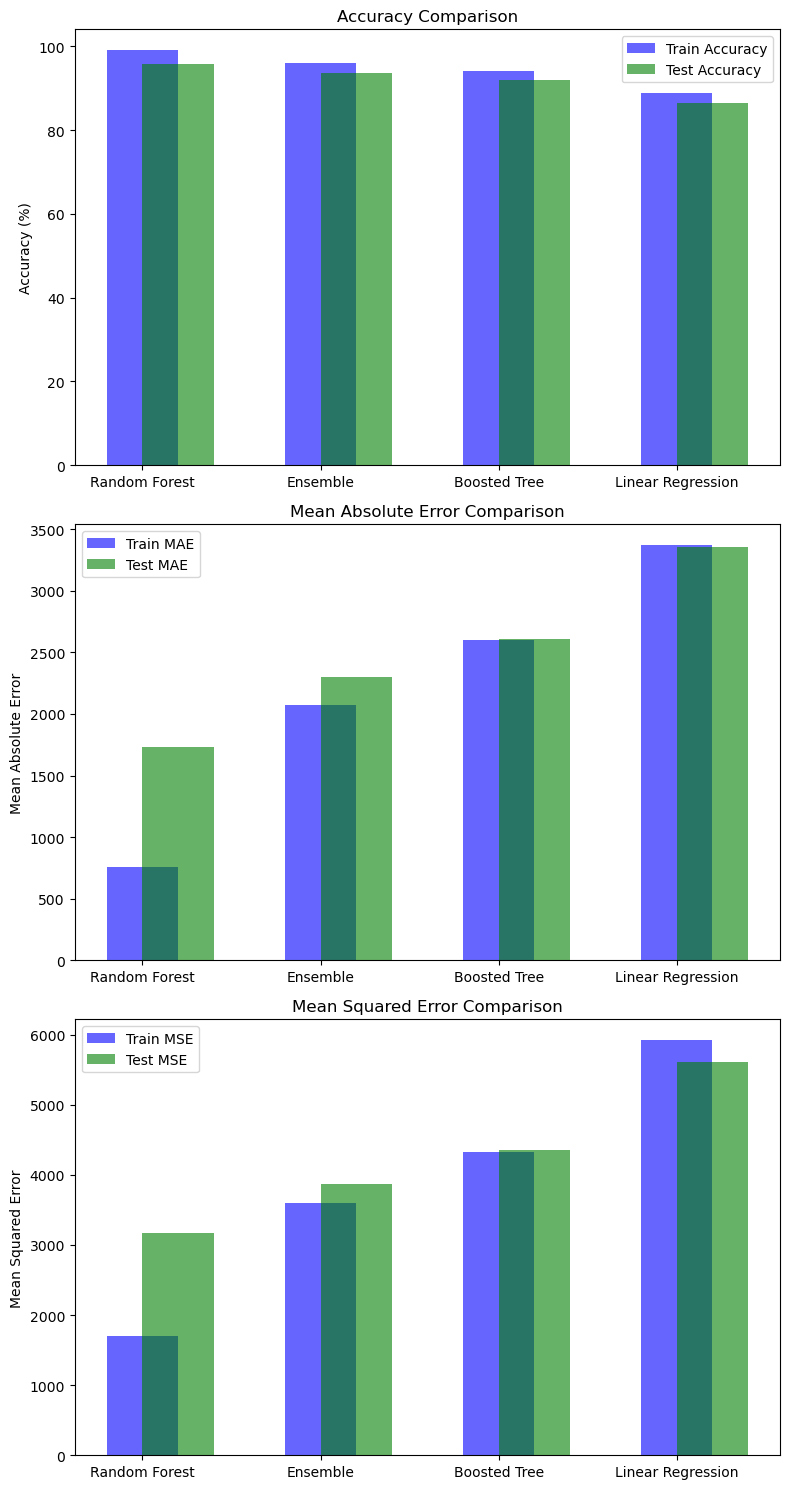

In [366]:
algorithms = train_test_performance['Algorithm']
accuracy_train = train_test_performance['Accuracy_train']
accuracy_test = train_test_performance['Accuracy_test']
mae_train = train_test_performance['Mean Absolute Error_train']
mae_test = train_test_performance['Mean Absolute Error_test']
mse_train = train_test_performance['Mean Squared Error_train']
mse_test = train_test_performance['Mean Squared Error_test']

# Creating subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Plotting Accuracy Comparison
axes[0].bar(algorithms, accuracy_train, width=0.4, label='Train Accuracy', align='center', color='blue', alpha=0.6)
axes[0].bar(algorithms, accuracy_test, width=0.4, label='Test Accuracy', align='edge', color='green', alpha=0.6)
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy (%)')
axes[0].legend()

# Plotting Mean Absolute Error Comparison
axes[1].bar(algorithms, mae_train, width=0.4, label='Train MAE', align='center', color='blue', alpha=0.6)
axes[1].bar(algorithms, mae_test, width=0.4, label='Test MAE', align='edge', color='green', alpha=0.6)
axes[1].set_title('Mean Absolute Error Comparison')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()

# Plotting Mean Squared Error Comparison
axes[2].bar(algorithms, mse_train, width=0.4, label='Train MSE', align='center', color='blue', alpha=0.6)
axes[2].bar(algorithms, mse_test, width=0.4, label='Test MSE', align='edge', color='green', alpha=0.6)
axes[2].set_title('Mean Squared Error Comparison')
axes[2].set_ylabel('Mean Squared Error')
axes[2].legend()

plt.tight_layout()
plt.show()

# 5. Model Evaluation and Analysis

## 5.1 Overall Performance with Cross-Validation

In [367]:
my_models = [lr,rf,gb,ensemble]

In [368]:
model_results_list = []
for my_model in my_models:
    eval_results = cross_validate(
        my_model, X, y, cv=3,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    )
    model_results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [217]:
model_results = pd.DataFrame(
    model_results_list,
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['Linear', 'Random Forest', 'Boosted Tree', 'Ensemble'])
model_results

,test_mae_mean,test_mae_std,train_mae_mean,train_mae_std
Linear,3365.60,2.96,3365.55,1.33
Random Forest,1745.22,3.21,756.86,3.63
Boosted Tree,2596.37,7.74,2583.00,9.29
Ensemble,2303.90,5.61,2065.10,2.02


## 5.2  True vs Predicted Analysis

In [160]:
xt = X.head(15)
yt = y.head(15)
pred_gb = gb.predict(xt)
pred_rf = rf.predict(xt)
pred_lr = lr.predict(xt)
pred_ens = ensemble.predict(xt)

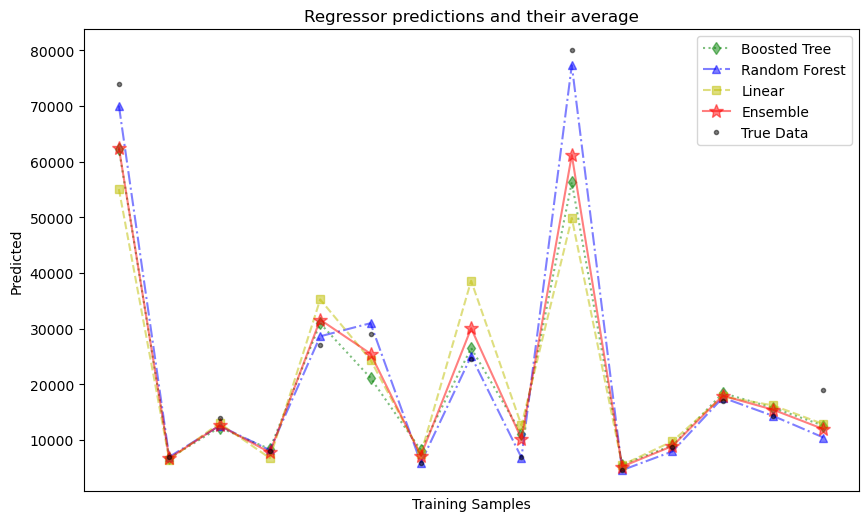

In [161]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gb, "gd:", alpha=0.5, label="Boosted Tree")
ax.plot(pred_rf, "b^-.", alpha=0.5, label="Random Forest")
ax.plot(pred_lr, "ys--", alpha=0.5, label="Linear")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("Predicted")
ax.set_xlabel("Training Samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average");

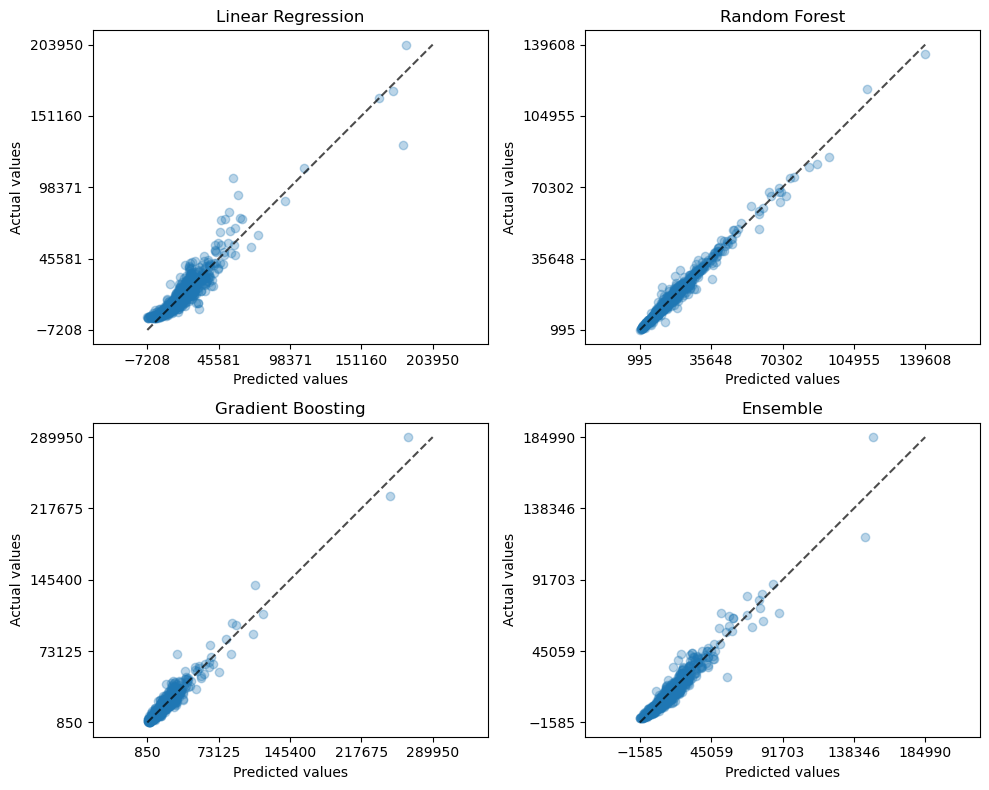

In [162]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Adjust the size as needed

# Linear Regression
PredictionErrorDisplay.from_estimator(
    lr, X, y, ax=axs[0, 0], kind="actual_vs_predicted", 
    scatter_kwargs=dict(alpha=0.3))
axs[0, 0].set_title('Linear Regression')

# Random Forest
PredictionErrorDisplay.from_estimator(
    rf, X, y, ax=axs[0, 1], kind="actual_vs_predicted", 
    scatter_kwargs=dict(alpha=0.3))
axs[0, 1].set_title('Random Forest')

# Gradient Boosting
PredictionErrorDisplay.from_estimator(
    gb, X, y, ax=axs[1, 0], kind="actual_vs_predicted", 
    scatter_kwargs=dict(alpha=0.3))
axs[1, 0].set_title('Gradient Boosting')

# Ensemble
PredictionErrorDisplay.from_estimator(
    ensemble, X, y, ax=axs[1, 1], kind="actual_vs_predicted", 
    scatter_kwargs=dict(alpha=0.3))
axs[1, 1].set_title('Ensemble')

plt.tight_layout()
plt.show()

## 5.3 Global and Local Explanations with SHAP

### 5.3.1 Local Explanation with SHAP

In [190]:
lr_explainer = shap.Explainer(lr, X_train)

In [164]:
rf_explainer = shap.TreeExplainer(rf, X_train)

In [165]:
gb_explainer = shap.TreeExplainer(gb, X_train)

In [166]:
lr_shap_values = lr_explainer(X_test)

In [ ]:
rf_shap_values = rf_explainer(X_test)

In [167]:
gb_shap_values = gb_explainer(X_test)

 99%|===================| 69923/70853 [00:51<00:00]        

#### 5.3.1.1 Linear Model

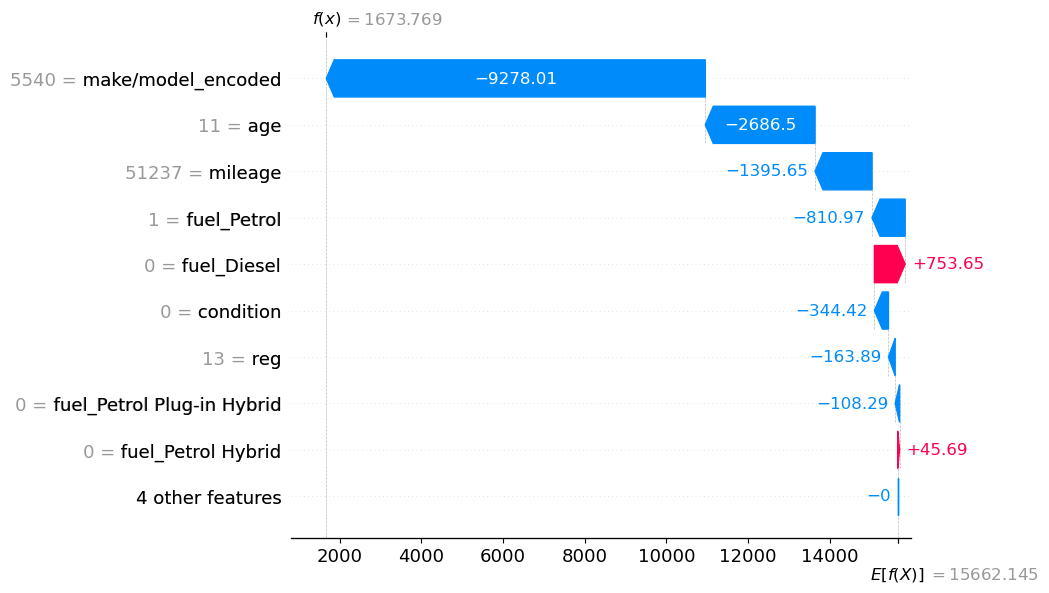

In [191]:
shap.plots.waterfall(lr_shap_values[1])

In [169]:
shap.plots.force(lr_shap_values[1])

#### 5.3.1.2 Random Forest Regressor

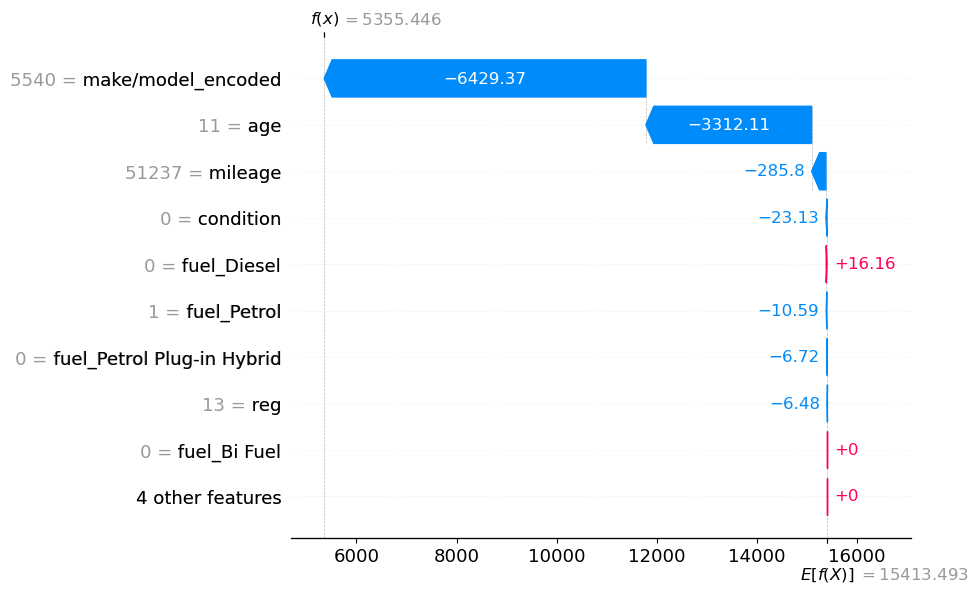

In [376]:
shap.plots.waterfall(rf_shap_values[1])

In [377]:
shap.plots.force(rf_shap_values[10])

#### 5.3.1.3 Boosted Tree

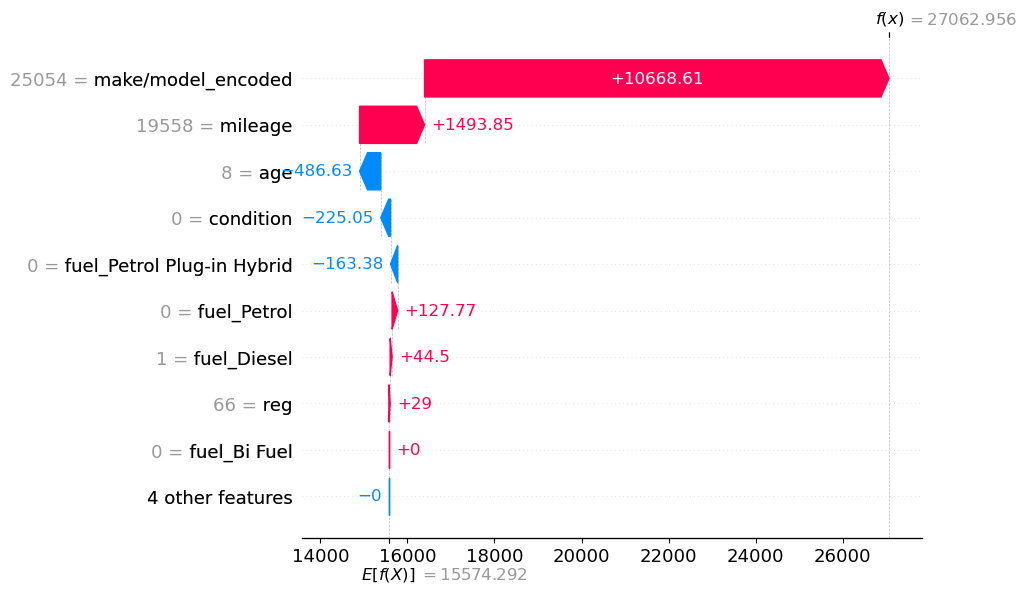

In [172]:
shap.plots.waterfall(gb_shap_values[5])

In [174]:
shap.plots.force(gb_shap_values[5])

### 5.3.2 Global explanation with SHAP

#### 5.3.2.1 A Linear Model

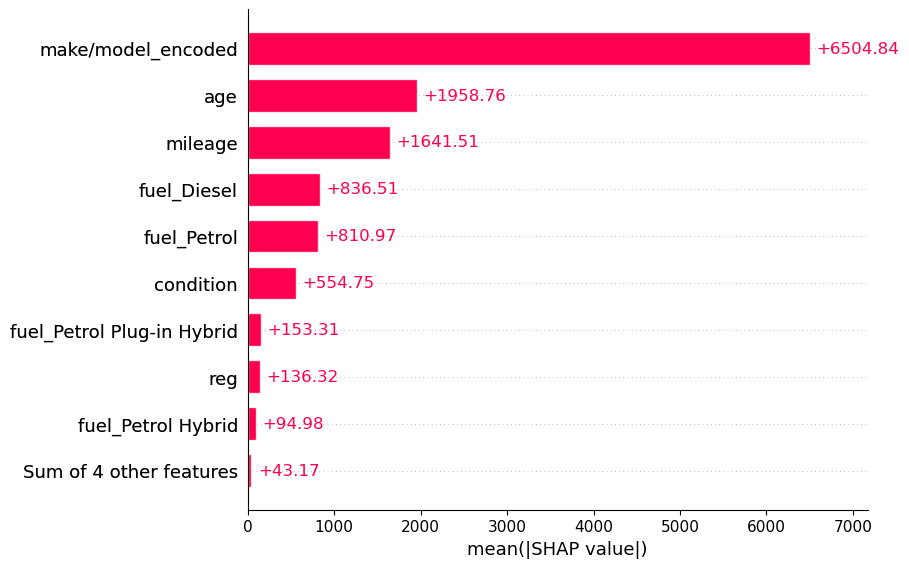

In [380]:
shap.plots.bar(lr_shap_values)

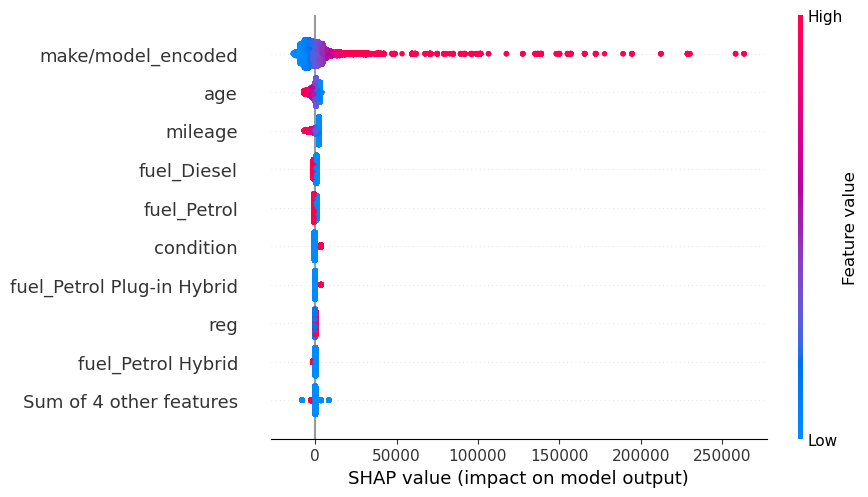

In [381]:
shap.plots.beeswarm(lr_shap_values)

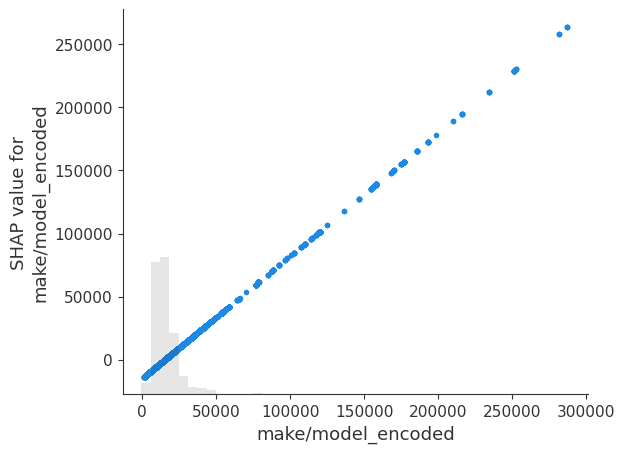

In [382]:
shap.plots.scatter(lr_shap_values[:, 'make/model_encoded'])

#### 5.3.2.2 Random Forest

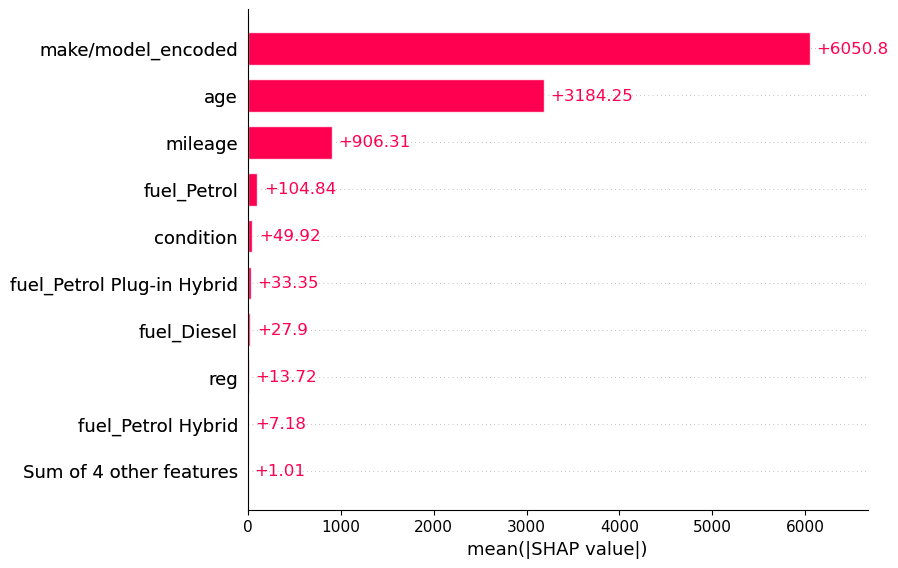

In [383]:
shap.plots.bar(rf_shap_values)

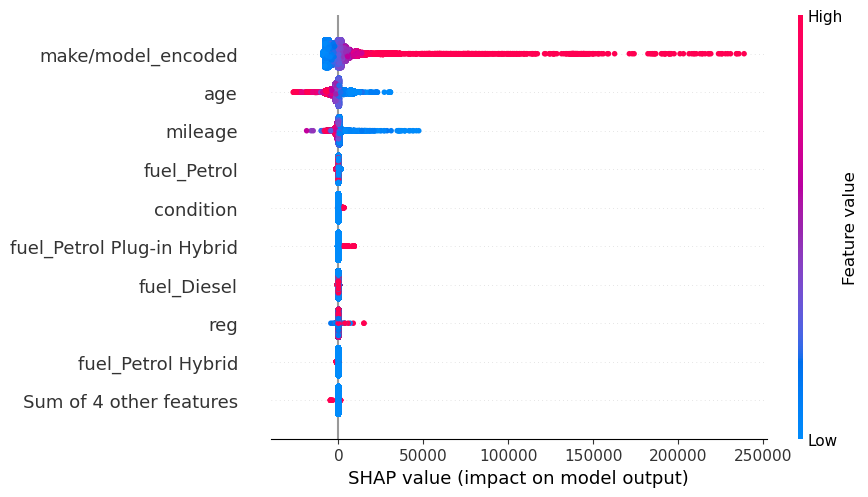

In [384]:
shap.plots.beeswarm(rf_shap_values)

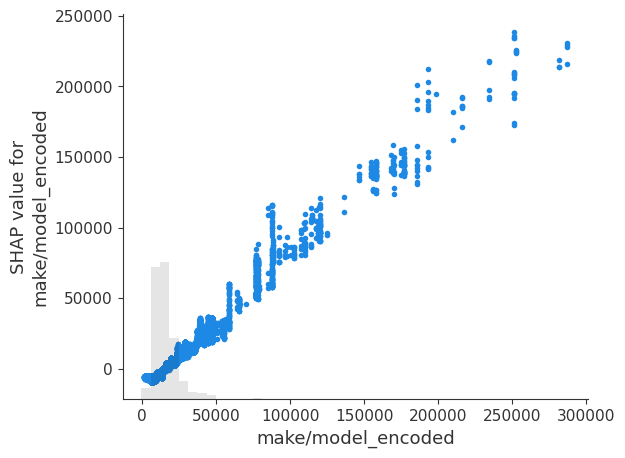

In [385]:
shap.plots.scatter(rf_shap_values[:, 'make/model_encoded'])

#### 5.3.2.3 Boosted Tree

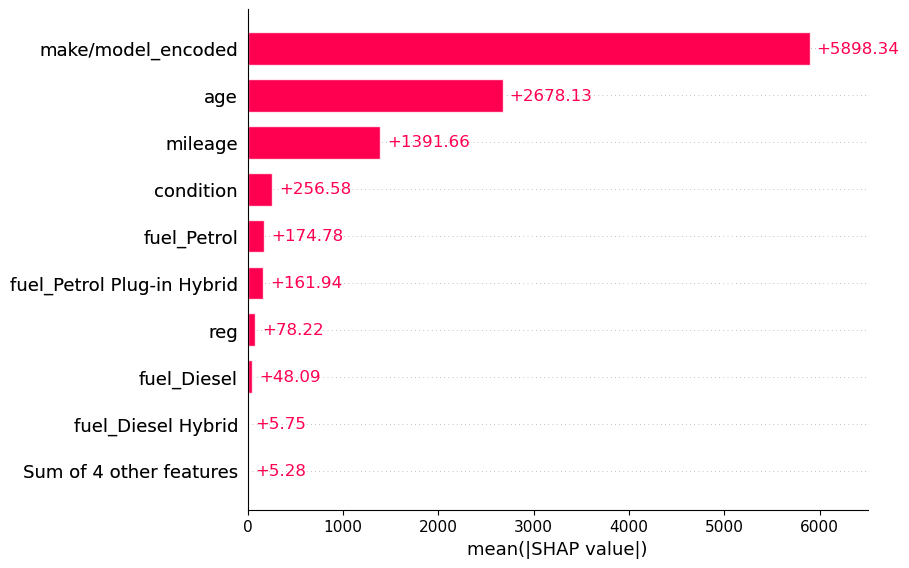

In [386]:
shap.plots.bar(gb_shap_values)

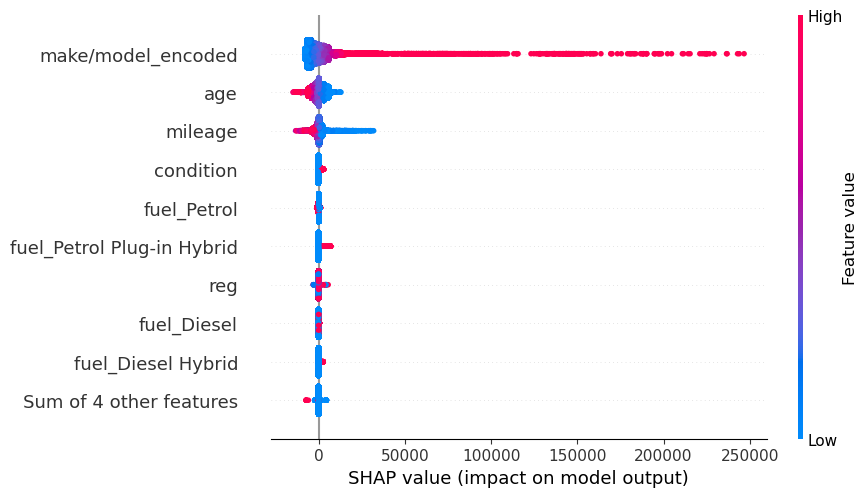

In [387]:
shap.plots.beeswarm(gb_shap_values)

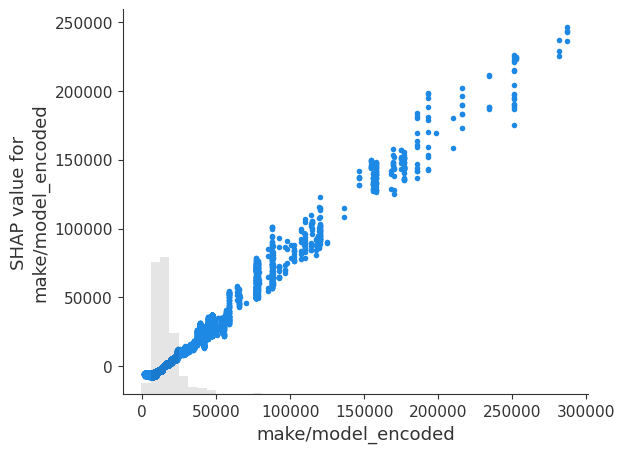

In [388]:
shap.plots.scatter(gb_shap_values[:, 'make/model_encoded'])

## 5.4 Partial Dependency Plots

In [193]:
from sklearn.inspection import PartialDependenceDisplay

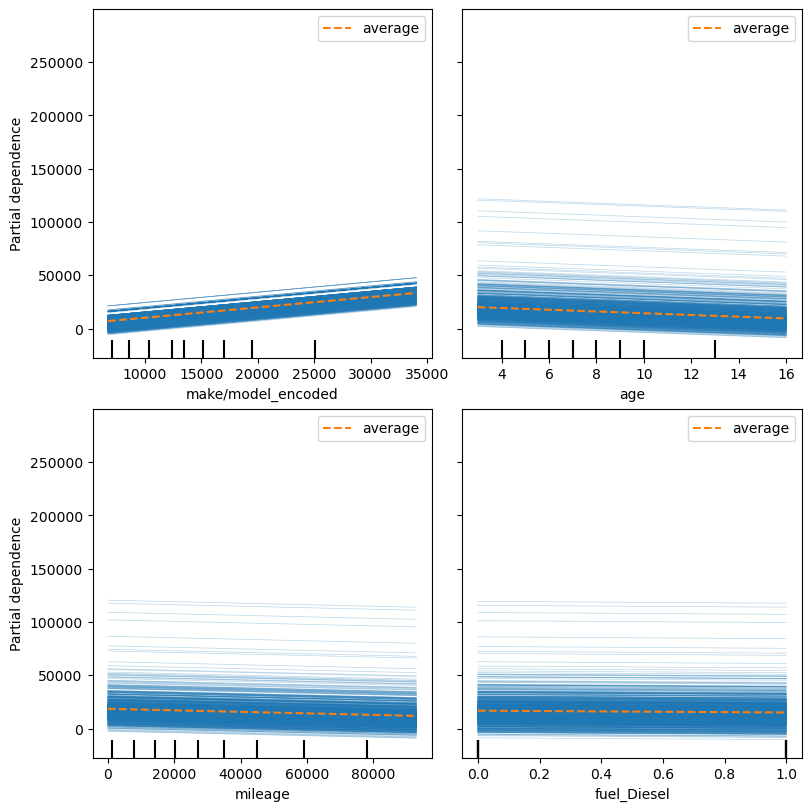

In [200]:
fig, ax = plt.subplots(figsize=(8,8), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lr, X_test, features=['make/model_encoded', 'age', 'mileage','fuel_Diesel'],
    kind='both', 
    subsample=1000, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

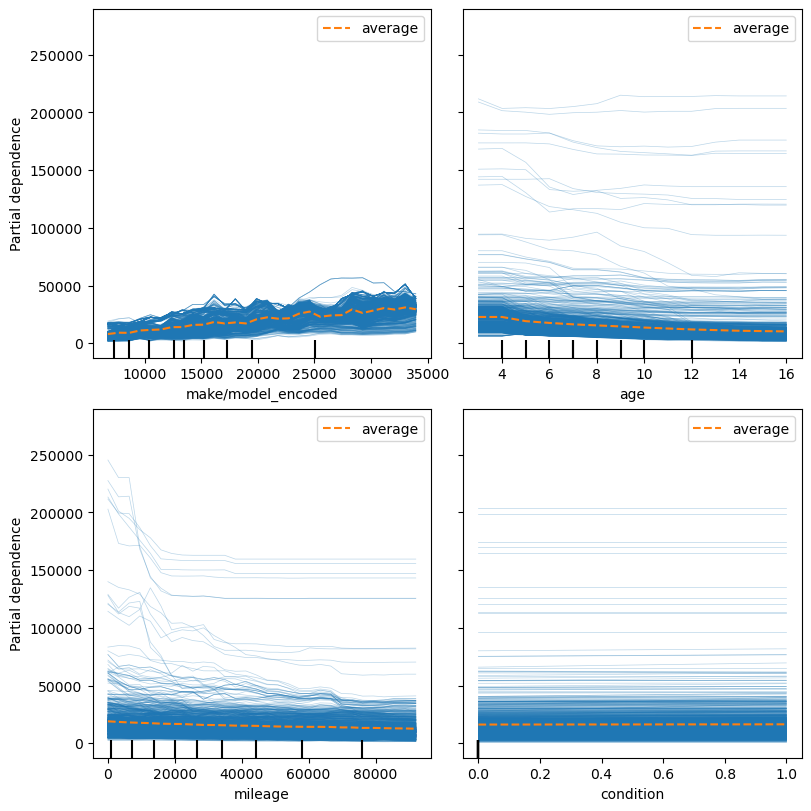

In [180]:
fig, ax = plt.subplots(figsize=(8,8), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf, X_test, features=['make/model_encoded', 'age', 'mileage','condition'],
    kind='both', 
    subsample=1000, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

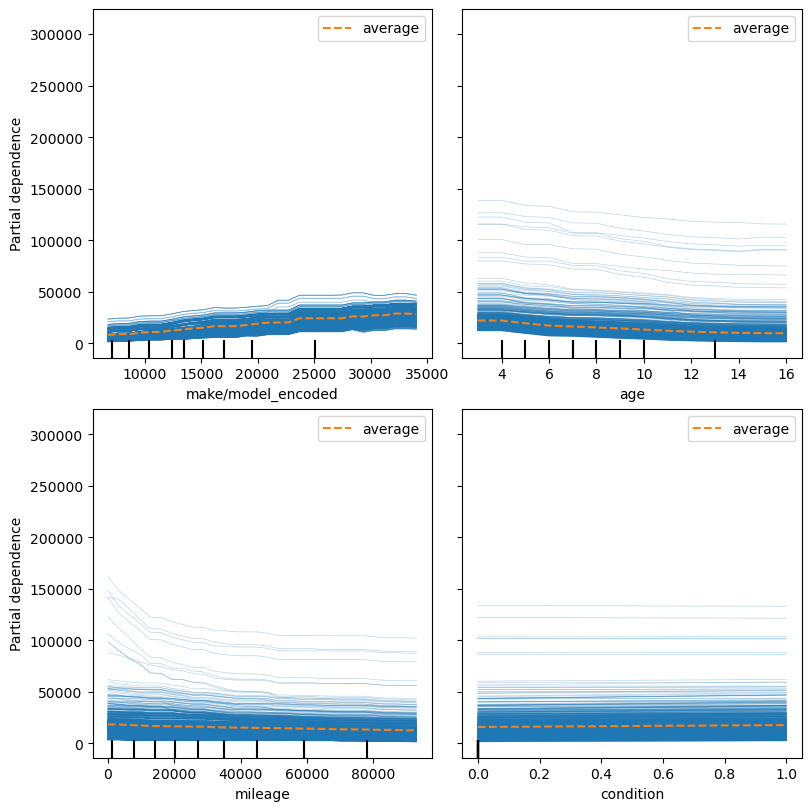

In [205]:
fig, ax = plt.subplots(figsize=(8,8), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gb, X_test, features=['make/model_encoded', 'age', 'mileage','condition'],
    kind='both',
    subsample=1000, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);